## We want to have a proper look a spatial networks now

    My last attempt while it gave some good results was fraught with errors. Now I believe I can blitz through this a  whole lot quicker 

In [1]:
import os
import sys


up1 = os.path.abspath('..') 
sys.path.insert(0, up1)

In [2]:
# Parameters
params = { 'data_dir' : "/data",
          'dim': (224,224),
          'batch_size': 32,
          'n_classes': 101,
          'n_channels': 3,
          'shuffle': True,
        'validation' : False}

In [3]:
from keras_data_generator.ucf101_datagenerator.generator_class import DataGenerator
from ucf101_data_utils import get_test_data, get_train_data
from network import getVggModel
from keras.optimizers import SGD

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [4]:
id_labels_train = get_train_data('../keras_data_generator/ucf101_splits/trainlist01.txt')
id_labels_test = get_test_data('../keras_data_generator/ucf101_splits/testlist01.txt',
                              '../keras_data_generator/ucf101_splits/classInd.txt')

training_generator = DataGenerator(*id_labels_train, **params)
params['validation'] = True
validation_generator = DataGenerator(*id_labels_test, **params)


In [ ]:

model=getVggModel((224,224,3))

In [ ]:
X = None
y = None

for (_x, _y) in training_generator:
    X = _x
    y = _y
    break
X.shape

In [ ]:
# quick check the generators are working
from matplotlib import pyplot as plt

plt.imshow(X[11,:,:,:])


In [ ]:
from keras.optimizers import SGD

mypotim = SGD(lr=1e-4, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])

In [ ]:
mod1 = model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=2, epochs=1,
                    verbose=1)

In [ ]:
mod1 = model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=2, epochs=20,
                    verbose=1)

In [ ]:
model.save_weights(filepath='.spatial_model_weights.hdf5')

In [ ]:
from network import getVggModel
model2=getVggModel((224,224,3))
model2.load_weights('.spatial_model_weights.hdf5')
mypotim = SGD(lr=1e-5, momentum=0.9)
model2.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])

In [ ]:
mod1 = model2.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=2, epochs=1,
                    verbose=1)

In [ ]:
mod1 = model2.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=2, epochs=10,
                    verbose=1)

In [41]:
model=getVggModel((224,224,3), printmod=0)
model.load_weights('.spatial_model_weights2.hdf5')

In [42]:
# freeze original VGG16 layers
for i, layer in enumerate(model.layers): 
    if 'block5' in layer.name:
        layer.trainable = True
        print(i)


15
16
17
18


In [43]:

mypotim = SGD(lr=0.5e-4, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])

In [9]:
mod1 = model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=2, epochs=2,
                    verbose=1)

Epoch 1/10
298/298 [==============================] - 134s 449ms/step - loss: 0.2426 - acc: 0.9495 - val_loss: 1.7542 - val_acc: 0.5675
Epoch 2/10
298/298 [==============================] - 133s 446ms/step - loss: 0.1952 - acc: 0.9593 - val_loss: 1.7559 - val_acc: 0.5686
Epoch 3/10
298/298 [==============================] - 134s 448ms/step - loss: 0.1619 - acc: 0.9677 - val_loss: 1.7676 - val_acc: 0.5731
Epoch 4/10
298/298 [==============================] - 134s 448ms/step - loss: 0.1388 - acc: 0.9736 - val_loss: 1.7803 - val_acc: 0.5720
Epoch 5/10
298/298 [==============================] - 134s 448ms/step - loss: 0.1172 - acc: 0.9787 - val_loss: 1.8086 - val_acc: 0.5789
Epoch 6/10
298/298 [==============================] - 133s 447ms/step - loss: 0.1022 - acc: 0.9825 - val_loss: 1.8276 - val_acc: 0.5797
Epoch 7/10
298/298 [==============================] - 133s 446ms/step - loss: 0.0869 - acc: 0.9863 - val_loss: 1.8283 - val_acc: 0.5826
Epoch 8/10
298/298 [============================

In [ ]:
mod1 = model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=2, epochs=2,
                    verbose=1)

Epoch 1/2
298/298 [==============================] - 134s 450ms/step - loss: 0.0498 - acc: 0.9943 - val_loss: 1.9003 - val_acc: 0.5829
Epoch 2/2
297/298 [============================>.] - ETA: 0s - loss: 0.0469 - acc: 0.9954

In [10]:
model.save_weights(filepath='.spatial_model_weights2.hdf5')

In [11]:
X = None
y = None

for (_x, _y) in validation_generator:
    X = _x
    y = _y
    break
X.shape

(32, 224, 224, 3)

In [12]:
from matplotlib import pyplot as plt



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


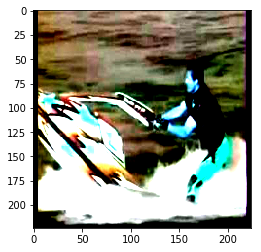

In [38]:
plt.imshow(X[19,])

In [39]:
prediction = model.predict(X[19,].reshape(1,224,224,3))

In [40]:
index = prediction.argsort()
index = index[0]

print(index[-1:-6:-1])
print(prediction[0,index[-1:-6:-1]])

[72 67 48 97 50]
[0.72780377 0.11702159 0.09015199 0.01524663 0.01336752]
